# Flight Price Prediction

- Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -
     1. Time of purchase patterns (making sure last-minute purchases are expensive)
     2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

- So, we have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

- We have to scrape at least 1500 rows of data.I am scrapping the data from 'Yatra.com'. We can scrape more data as well, it’s up to individual, More the data better the model.  The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns areairline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. We can make changes to it, we can add or we can remove some columns, it completely depends on the website from which we are fetching the data.

- After collecting the data, we need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.


In [1]:
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import re
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

In [25]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?type=O&viewName=normal&flexi=0&noOfSegments=1&origin=SXR&originCountry=IN&destination=DEL&destinationCountry=IN&flight_depart_date=17%2F11%2F2021&ADT=1&CHD=0&INF=0&preferred=&class=Economy&source=seo"
driver.get(url)

In [2]:
Airline= []
Date_of_journey= []
Departure= []
Arrival= []
Arr_time= []
Dep_time= []
Duration= []
Total_stops= []
Price= []

In [60]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [63]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=18%2F11%2F2021&hb=&noOfSegments=1&origin=SXR&originCountry=IN&type=O&unique=1634377010162&viewName=normal"
driver.get(url)

In [64]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [65]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=21%2F11%2F2021&hb=&noOfSegments=1&origin=SXR&originCountry=IN&type=O&unique=1634378365705&viewName=normal"
driver.get(url)

In [66]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [67]:
df=pd.DataFrame({"Airline":Airline,
                 "Date_of_journey":Date_of_journey,
                 "Departure":Departure,
                 "Arrival":Arrival,
                 "Arr_time":Arr_time,
                 "Dep_time":Dep_time,
                 "Duration":Duration,
                 "Total_stops":Total_stops,
                 "Price":Price})

df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,SpiceJet,"Wed, 17 Nov 2021",Srinagar (SXR),New Delhi,18:30,17:00,1h 30m,Non Stop,"3,710"
1,SpiceJet,"Wed, 17 Nov 2021",Srinagar (SXR),New Delhi,10:30,08:45,1h 45m,Non Stop,"3,710"
2,SpiceJet,"Wed, 17 Nov 2021",Srinagar (SXR),New Delhi,11:20,09:35,1h 45m,Non Stop,"3,710"
3,Air Asia,"Wed, 17 Nov 2021",Srinagar (SXR),New Delhi,11:20,09:50,1h 30m,Non Stop,"3,711"
4,Air Asia,"Wed, 17 Nov 2021",Srinagar (SXR),New Delhi,18:05,16:30,1h 35m,Non Stop,"3,711"
...,...,...,...,...,...,...,...,...,...
100,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,22:25,15:10,7h 15m,1 Stop,"16,226"
101,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,00:50\n+ 1 day,15:10,9h 40m,1 Stop,"16,226"
102,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,02:00\n+ 1 day,15:10,10h 50m,1 Stop,"16,226"
103,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,08:10\n+ 1 day,15:10,17h 00m,1 Stop,"16,226"


In [68]:
df.to_csv('flight_price_1.csv')

In [22]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?type=O&viewName=normal&flexi=0&noOfSegments=1&origin=BLR&originCountry=IN&destination=DEL&destinationCountry=IN&flight_depart_date=19%2F11%2F2021&ADT=1&CHD=0&INF=0&preferred=&class=Economy&source=seo"
driver.get(url)

In [25]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [36]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=20%2F11%2F2021&hb=&noOfSegments=1&origin=BLR&originCountry=IN&type=O&unique=1634409526345&viewName=normal"
driver.get(url)

In [37]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [ ]:
df=pd.DataFrame({"Airline":Airline,
                 "Date_of_journey":Date_of_journey,
                 "Departure":Departure,
                 "Arrival":Arrival,
                 "Arr_time":Arr_time,
                 "Dep_time":Dep_time,
                 "Duration":Duration,
                 "Total_stops":Total_stops,
                 "Price":Price})

df

In [ ]:
df.to_csv('flight_price_2.csv')

In [4]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=24%2F11%2F2021&hb=&noOfSegments=1&origin=BLR&originCountry=IN&type=O&unique=1634410375385&viewName=normal"
driver.get(url)

In [5]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [15]:
df=pd.DataFrame({"Airline":Airline,
                 "Date_of_journey":Date_of_journey,
                 "Departure":Departure,
                 "Arrival":Arrival,
                 "Arr_time":Arr_time,
                 "Dep_time":Dep_time,
                 "Duration":Duration,
                 "Total_stops":Total_stops,
                 "Price":Price})

df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,Air India,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,20:35,17:50,2h 45m,Non Stop,"3,546"
1,IndiGo,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,23:45,18:45,5h 00m,1 Stop,"3,546"
2,IndiGo,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,18:10,13:05,5h 05m,1 Stop,"3,546"
3,IndiGo,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,20:25,15:20,5h 05m,1 Stop,"3,546"
4,IndiGo,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,22:25,16:20,6h 05m,1 Stop,"3,546"
...,...,...,...,...,...,...,...,...,...
155,Air India,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,23:15,06:45,16h 30m,3 Stop(s),"9,323"
156,Air India,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,23:45,06:45,17h 00m,2 Stop(s),"9,880"
157,Go First,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,20:20,15:45,4h 35m,1 Stop,"10,680"
158,Vistara,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,17:05,12:20,4h 45m,1 Stop,"11,379"


In [16]:
df.to_csv('flight_price_3.csv')

In [3]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?type=O&viewName=normal&flexi=0&noOfSegments=1&origin=BOM&originCountry=IN&destination=CCU&destinationCountry=IN&flight_depart_date=26%2F11%2F2021&ADT=1&CHD=0&INF=0&preferred=&class=Economy&source=seo"
driver.get(url)

In [4]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [12]:
df=pd.DataFrame({"Airline":Airline,
                 "Date_of_journey":Date_of_journey,
                 "Departure":Departure,
                 "Arrival":Arrival,
                 "Arr_time":Arr_time,
                 "Dep_time":Dep_time,
                 "Duration":Duration,
                 "Total_stops":Total_stops,
                 "Price":Price})

df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,Air India,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,12:10,07:55,4h 15m,1 Stop,"3,707"
1,IndiGo,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,00:30\n+ 1 day,18:30,6h 00m,1 Stop,"3,707"
2,IndiGo,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,00:30\n+ 1 day,17:10,7h 20m,1 Stop,"3,707"
3,IndiGo,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,06:05\n+ 1 day,19:55,10h 10m,1 Stop,"3,707"
4,IndiGo,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,06:05\n+ 1 day,18:30,11h 35m,1 Stop,"3,707"
...,...,...,...,...,...,...,...,...,...
124,Go First,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,16:15,10:55,5h 20m,1 Stop,"11,697"
125,Vistara,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,22:45,13:20,9h 25m,2 Stop(s),"12,305"
126,Vistara,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,19:35\n+ 1 day,16:05,27h 30m,2 Stop(s),"12,430"
127,Vistara,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,19:35,09:55,9h 40m,2 Stop(s),"14,020"


In [13]:
df.to_csv('flight_price_4.csv')

In [16]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=CCU&destinationCountry=IN&flexi=0&flight_depart_date=30%2F11%2F2021&hb=&noOfSegments=1&origin=BOM&originCountry=IN&type=O&unique=1634455699110&viewName=normal"
driver.get(url)

In [17]:
Airline= []
Date_of_journey= []
Departure= []
Arrival= []
Arr_time= []
Dep_time= []
Duration= []
Total_stops= []
Price= []

In [18]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [28]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=CCU&destinationCountry=IN&flexi=0&flight_depart_date=10%2F11%2F2021&hb=0&noOfSegments=1&origin=BOM&originCountry=IN&type=O&unique=1002500582053&version=1.1&viewName=normal"
driver.get(url)

In [29]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [38]:
df=pd.DataFrame({"Airline":Airline,
                 "Date_of_journey":Date_of_journey,
                 "Departure":Departure,
                 "Arrival":Arrival,
                 "Arr_time":Arr_time,
                 "Dep_time":Dep_time,
                 "Duration":Duration,
                 "Total_stops":Total_stops,
                 "Price":Price})

df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,Air India,"Tue, 30 Nov 2021",Mumbai (BOM),Kolkata,12:10,07:55,4h 15m,1 Stop,"2,835"
1,IndiGo,"Tue, 30 Nov 2021",Mumbai (BOM),Kolkata,20:15,15:50,4h 25m,1 Stop,"3,707"
2,IndiGo,"Tue, 30 Nov 2021",Mumbai (BOM),Kolkata,22:25,16:55,5h 30m,1 Stop,"3,707"
3,IndiGo,"Tue, 30 Nov 2021",Mumbai (BOM),Kolkata,22:40,17:10,5h 30m,1 Stop,"3,707"
4,IndiGo,"Tue, 30 Nov 2021",Mumbai (BOM),Kolkata,19:35,12:20,7h 15m,1 Stop,"3,707"
...,...,...,...,...,...,...,...,...,...
239,Vistara,"Wed, 10 Nov 2021",Mumbai (BOM),Kolkata,19:35,09:55,9h 40m,2 Stop(s),"15,498"
240,Vistara,"Wed, 10 Nov 2021",Mumbai (BOM),Kolkata,19:35,07:05,12h 30m,2 Stop(s),"16,078"
241,Vistara,"Wed, 10 Nov 2021",Mumbai (BOM),Kolkata,19:35,09:05,10h 30m,2 Stop(s),"16,225"
242,Vistara,"Wed, 10 Nov 2021",Mumbai (BOM),Kolkata,22:45,13:20,9h 25m,2 Stop(s),"16,316"


In [39]:
df.to_csv('flight_price_5.csv')

In [40]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=MAA&destinationCountry=IN&flexi=0&flight_depart_date=31%2F10%2F2021&hb=0&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=363072809928&version=1.1&viewName=normal"
driver.get(url)

In [41]:
Airline= []
Date_of_journey= []
Departure= []
Arrival= []
Arr_time= []
Dep_time= []
Duration= []
Total_stops= []
Price= []

In [42]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [52]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=MAA&destinationCountry=IN&flexi=0&flight_depart_date=05%2F11%2F2021&hb=0&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=373752031714&version=1.1&viewName=normal"
driver.get(url)

In [53]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [63]:
df=pd.DataFrame({"Airline":Airline,
                 "Date_of_journey":Date_of_journey,
                 "Departure":Departure,
                 "Arrival":Arrival,
                 "Arr_time":Arr_time,
                 "Dep_time":Dep_time,
                 "Duration":Duration,
                 "Total_stops":Total_stops,
                 "Price":Price})

df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,Air Asia,"Sun, 31 Oct 2021",New Delhi (DEL),Chennai,15:05,09:25,5h 40m,1 Stop,"7,423"
1,Air Asia,"Sun, 31 Oct 2021",New Delhi (DEL),Chennai,17:25,09:35,7h 50m,1 Stop,"7,423"
2,Air Asia,"Sun, 31 Oct 2021",New Delhi (DEL),Chennai,22:50,14:40,8h 10m,1 Stop,"7,423"
3,Air Asia,"Sun, 31 Oct 2021",New Delhi (DEL),Chennai,16:30,08:00,8h 30m,1 Stop,"7,423"
4,Air Asia,"Sun, 31 Oct 2021",New Delhi (DEL),Chennai,22:00,12:50,9h 10m,1 Stop,"7,423"
...,...,...,...,...,...,...,...,...,...
253,Air India,"Fri, 5 Nov 2021",New Delhi (DEL),Chennai,07:20\n+ 1 day,15:05,16h 15m,2 Stop(s),"18,975"
254,Air India,"Fri, 5 Nov 2021",New Delhi (DEL),Chennai,12:50\n+ 1 day,10:35,26h 15m,2 Stop(s),"23,314"
255,Air India,"Fri, 5 Nov 2021",New Delhi (DEL),Chennai,07:20\n+ 1 day,10:35,20h 45m,2 Stop(s),"26,461"
256,Air India,"Fri, 5 Nov 2021",New Delhi (DEL),Chennai,07:20\n+ 1 day,10:55,20h 25m,2 Stop(s),"27,480"


In [64]:
df.to_csv('flight_price_6.csv')

In [2]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=PNQ&destinationCountry=IN&flexi=0&flight_depart_date=29%2F10%2F2021&hb=0&noOfSegments=1&origin=HYD&originCountry=IN&type=O&unique=1507188368003&version=1.1&viewName=normal"
driver.get(url)

In [3]:
Airline= []
Date_of_journey= []
Departure= []
Arrival= []
Arr_time= []
Dep_time= []
Duration= []
Total_stops= []
Price= []

In [4]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [14]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=PNQ&destinationCountry=IN&flexi=0&flight_depart_date=14%2F11%2F2021&hb=0&noOfSegments=1&origin=HYD&originCountry=IN&type=O&unique=31629942891&version=1.1&viewName=normal"
driver.get(url)

In [15]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [22]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=PNQ&destinationCountry=IN&flexi=0&flight_depart_date=16%2F11%2F2021&hb=0&noOfSegments=1&origin=HYD&originCountry=IN&type=O&unique=1634496090057&viewName=normal"
driver.get(url)

In [23]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [26]:
df=pd.DataFrame({"Airline":Airline,
                 "Date_of_journey":Date_of_journey,
                 "Departure":Departure,
                 "Arrival":Arrival,
                 "Arr_time":Arr_time,
                 "Dep_time":Dep_time,
                 "Duration":Duration,
                 "Total_stops":Total_stops,
                 "Price":Price})

df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,Go First,"Fri, 29 Oct 2021",Hyderabad (HYD),Pune,10:10\n+ 1 day,18:30,15h 40m,1 Stop,"5,292"
1,Air Asia,"Fri, 29 Oct 2021",Hyderabad (HYD),Pune,08:10\n+ 1 day,23:50,8h 20m,1 Stop,"7,775"
2,Air India,"Fri, 29 Oct 2021",Hyderabad (HYD),Pune,08:40\n+ 1 day,19:20,13h 20m,2 Stop(s),"8,698"
3,Air India,"Fri, 29 Oct 2021",Hyderabad (HYD),Pune,08:40\n+ 1 day,16:15,16h 25m,1 Stop,"8,698"
4,Air India,"Fri, 29 Oct 2021",Hyderabad (HYD),Pune,08:40\n+ 1 day,11:05,21h 35m,1 Stop,"8,698"
...,...,...,...,...,...,...,...,...,...
210,Vistara,"Tue, 16 Nov 2021",Hyderabad (HYD),Pune,18:35,08:20,10h 15m,2 Stop(s),"14,960"
211,Vistara,"Tue, 16 Nov 2021",Hyderabad (HYD),Pune,19:40,08:20,11h 20m,2 Stop(s),"14,960"
212,Air India,"Tue, 16 Nov 2021",Hyderabad (HYD),Pune,12:15\n+ 1 day,16:15,20h 00m,3 Stop(s),"16,738"
213,IndiGo,"Tue, 16 Nov 2021",Hyderabad (HYD),Pune,18:45,09:40,9h 05m,1 Stop,"17,631"


In [27]:
df.to_csv('flight_price_7.csv')

In [2]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=CCU&destinationCountry=IN&flexi=0&flight_depart_date=20%2F10%2F2021&hb=0&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1569004396889&version=1.1&viewName=normal"
driver.get(url)

In [3]:
Airline= []
Date_of_journey= []
Departure= []
Arrival= []
Arr_time= []
Dep_time= []
Duration= []
Total_stops= []
Price= []

In [4]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [8]:
df=pd.DataFrame({"Airline":Airline,
                 "Date_of_journey":Date_of_journey,
                 "Departure":Departure,
                 "Arrival":Arrival,
                 "Arr_time":Arr_time,
                 "Dep_time":Dep_time,
                 "Duration":Duration,
                 "Total_stops":Total_stops,
                 "Price":Price})

df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,18:40,6h 55m,1 Stop,"5,951"
1,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,18:40,7h 00m,1 Stop,"5,951"
2,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,16:15,9h 20m,1 Stop,"5,951"
3,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,16:15,9h 25m,1 Stop,"5,951"
4,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,21:20,08:00,13h 20m,1 Stop,"5,951"
...,...,...,...,...,...,...,...,...,...
110,Air India,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,14:25\n+ 1 day,13:30,24h 55m,1 Stop,"18,345"
111,Air India,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,16:45,11:15,5h 30m,1 Stop,"18,493"
112,Air India,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,13:00\n+ 1 day,16:15,20h 45m,1 Stop,"25,065"
113,Air India,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,17:25\n+ 1 day,16:15,25h 10m,1 Stop,"25,065"


In [10]:
df.to_csv('flight_price_8.csv')

In [13]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://flight.yatra.com/air-search-ui/seodom/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=CCU&destinationCountry=IN&flexi=0&flight_depart_date=02%2F11%2F2021&hb=0&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1226193684403&version=1.1&viewName=normal"
driver.get(url)

In [14]:
Airline= []
Date_of_journey= []
Departure= []
Arrival= []
Arr_time= []
Dep_time= []
Duration= []
Total_stops= []
Price= []

In [15]:
airline=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']/span")
for i in airline:
    Airline.append(i.text)

    
date=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[3]")
for i in date:
    Date_of_journey.append(i.text)
    
    
departure=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[1]")
for i in departure:
    Departure.append(i.text)
    
    

arrival=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[2]")
for i in arrival:
    Arrival.append(i.text)    
    

time=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[1]/div/div[3]/p[1]")
for i in time:
    Arr_time.append(i.text)      

    
dep=driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/div[1]/div[2]")
for i in dep:
    Dep_time.append(i.text)
    
    
duration= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/p")
for i in duration:
    Duration.append(i.text)
    
stops= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/span")
for i in stops:
    Total_stops.append(i.text)
    
    
price= driver.find_elements_by_xpath("/html/body/section[2]/section/section[2]/section[1]/div[2]/div[2]/div/div/div/div[1]/div[4]/div/div[1]/div/label/div/div[2]")
for i in price:
    Price.append(i.text)

In [18]:
df=pd.DataFrame({"Airline":Airline,
                 "Date_of_journey":Date_of_journey,
                 "Departure":Departure,
                 "Arrival":Arrival,
                 "Arr_time":Arr_time,
                 "Dep_time":Dep_time,
                 "Duration":Duration,
                 "Total_stops":Total_stops,
                 "Price":Price})

df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,Air India,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,09:00,06:50,2h 10m,Non Stop,"4,931"
1,Air Asia,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,12:00,06:20,5h 40m,1 Stop,"5,951"
2,Air Asia,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,01:25\n+ 1 day,18:35,6h 50m,1 Stop,"5,951"
3,Air Asia,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,18:35,7h 00m,1 Stop,"5,951"
4,Air Asia,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,15:25,07:10,8h 15m,2 Stop(s),"5,951"
...,...,...,...,...,...,...,...,...,...
126,Vistara,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,09:45\n+ 1 day,14:15,19h 30m,2 Stop(s),"19,534"
127,Vistara,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,09:45\n+ 1 day,14:15,19h 30m,2 Stop(s),"19,534"
128,Vistara,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,09:45\n+ 1 day,14:15,19h 30m,2 Stop(s),"19,534"
129,Vistara,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,09:45\n+ 1 day,08:05,25h 40m,2 Stop(s),"19,534"


In [19]:
df.to_csv('flight_price_9.csv')

### Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1=pd.read_csv('flight_price_1.csv')
df_1

,Unnamed: 0,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,0,SpiceJet,"Wed, 17 Nov 2021",Srinagar (SXR),New Delhi,18:30,17:00,1h 30m,Non Stop,"3,710"
1,1,SpiceJet,"Wed, 17 Nov 2021",Srinagar (SXR),New Delhi,10:30,08:45,1h 45m,Non Stop,"3,710"
2,2,SpiceJet,"Wed, 17 Nov 2021",Srinagar (SXR),New Delhi,11:20,09:35,1h 45m,Non Stop,"3,710"
3,3,Air Asia,"Wed, 17 Nov 2021",Srinagar (SXR),New Delhi,11:20,09:50,1h 30m,Non Stop,"3,711"
4,4,Air Asia,"Wed, 17 Nov 2021",Srinagar (SXR),New Delhi,18:05,16:30,1h 35m,Non Stop,"3,711"
...,...,...,...,...,...,...,...,...,...,...
100,100,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,22:25,15:10,7h 15m,1 Stop,"16,226"
101,101,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,00:50\n+ 1 day,15:10,9h 40m,1 Stop,"16,226"
102,102,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,02:00\n+ 1 day,15:10,10h 50m,1 Stop,"16,226"
103,103,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,08:10\n+ 1 day,15:10,17h 00m,1 Stop,"16,226"


In [3]:
df_2=pd.read_csv('flight_price_2.csv')
df_2

,Unnamed: 0,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,0,IndiGo,"Fri, 19 Nov 2021",Bangalore (BLR),New Delhi,22:25,16:20,6h 05m,1 Stop,"3,546"
1,1,IndiGo,"Fri, 19 Nov 2021",Bangalore (BLR),New Delhi,19:55,13:05,6h 50m,1 Stop,"3,546"
2,2,IndiGo,"Fri, 19 Nov 2021",Bangalore (BLR),New Delhi,07:15\n+ 1 day,23:45,7h 30m,1 Stop,"3,546"
3,3,IndiGo,"Fri, 19 Nov 2021",Bangalore (BLR),New Delhi,17:35,09:50,7h 45m,1 Stop,"3,546"
4,4,IndiGo,"Fri, 19 Nov 2021",Bangalore (BLR),New Delhi,22:25,13:05,9h 20m,1 Stop,"3,546"
...,...,...,...,...,...,...,...,...,...,...
316,316,Vistara,"Sat, 20 Nov 2021",Bangalore (BLR),New Delhi,20:40,13:50,6h 50m,1 Stop,"11,626"
317,317,IndiGo,"Sat, 20 Nov 2021",Bangalore (BLR),New Delhi,09:15\n+ 1 day,23:45,9h 30m,1 Stop,"11,983"
318,318,IndiGo,"Sat, 20 Nov 2021",Bangalore (BLR),New Delhi,09:15\n+ 1 day,21:55,11h 20m,1 Stop,"11,983"
319,319,Vistara,"Sat, 20 Nov 2021",Bangalore (BLR),New Delhi,17:05,12:20,4h 45m,1 Stop,"12,078"


In [4]:
df_3=pd.read_csv('flight_price_3.csv')
df_3

,Unnamed: 0,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,0,Air India,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,20:35,17:50,2h 45m,Non Stop,"3,546"
1,1,IndiGo,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,23:45,18:45,5h 00m,1 Stop,"3,546"
2,2,IndiGo,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,18:10,13:05,5h 05m,1 Stop,"3,546"
3,3,IndiGo,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,20:25,15:20,5h 05m,1 Stop,"3,546"
4,4,IndiGo,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,22:25,16:20,6h 05m,1 Stop,"3,546"
...,...,...,...,...,...,...,...,...,...,...
155,155,Air India,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,23:15,06:45,16h 30m,3 Stop(s),"9,323"
156,156,Air India,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,23:45,06:45,17h 00m,2 Stop(s),"9,880"
157,157,Go First,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,20:20,15:45,4h 35m,1 Stop,"10,680"
158,158,Vistara,"Wed, 24 Nov 2021",Bangalore (BLR),New Delhi,17:05,12:20,4h 45m,1 Stop,"11,379"


In [5]:
df_4=pd.read_csv('flight_price_4.csv')
df_4

,Unnamed: 0,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,0,Air India,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,12:10,07:55,4h 15m,1 Stop,"3,707"
1,1,IndiGo,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,00:30\n+ 1 day,18:30,6h 00m,1 Stop,"3,707"
2,2,IndiGo,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,00:30\n+ 1 day,17:10,7h 20m,1 Stop,"3,707"
3,3,IndiGo,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,06:05\n+ 1 day,19:55,10h 10m,1 Stop,"3,707"
4,4,IndiGo,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,06:05\n+ 1 day,18:30,11h 35m,1 Stop,"3,707"
...,...,...,...,...,...,...,...,...,...,...
124,124,Go First,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,16:15,10:55,5h 20m,1 Stop,"11,697"
125,125,Vistara,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,22:45,13:20,9h 25m,2 Stop(s),"12,305"
126,126,Vistara,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,19:35\n+ 1 day,16:05,27h 30m,2 Stop(s),"12,430"
127,127,Vistara,"Fri, 26 Nov 2021",Mumbai (BOM),Kolkata,19:35,09:55,9h 40m,2 Stop(s),"14,020"


In [6]:
df_5=pd.read_csv('flight_price_5.csv')
df_5

,Unnamed: 0,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,0,Air India,"Tue, 30 Nov 2021",Mumbai (BOM),Kolkata,12:10,07:55,4h 15m,1 Stop,"2,835"
1,1,IndiGo,"Tue, 30 Nov 2021",Mumbai (BOM),Kolkata,20:15,15:50,4h 25m,1 Stop,"3,707"
2,2,IndiGo,"Tue, 30 Nov 2021",Mumbai (BOM),Kolkata,22:25,16:55,5h 30m,1 Stop,"3,707"
3,3,IndiGo,"Tue, 30 Nov 2021",Mumbai (BOM),Kolkata,22:40,17:10,5h 30m,1 Stop,"3,707"
4,4,IndiGo,"Tue, 30 Nov 2021",Mumbai (BOM),Kolkata,19:35,12:20,7h 15m,1 Stop,"3,707"
...,...,...,...,...,...,...,...,...,...,...
239,239,Vistara,"Wed, 10 Nov 2021",Mumbai (BOM),Kolkata,19:35,09:55,9h 40m,2 Stop(s),"15,498"
240,240,Vistara,"Wed, 10 Nov 2021",Mumbai (BOM),Kolkata,19:35,07:05,12h 30m,2 Stop(s),"16,078"
241,241,Vistara,"Wed, 10 Nov 2021",Mumbai (BOM),Kolkata,19:35,09:05,10h 30m,2 Stop(s),"16,225"
242,242,Vistara,"Wed, 10 Nov 2021",Mumbai (BOM),Kolkata,22:45,13:20,9h 25m,2 Stop(s),"16,316"


In [7]:
df_6=pd.read_csv('flight_price_6.csv')
df_6

,Unnamed: 0,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,0,Air Asia,"Sun, 31 Oct 2021",New Delhi (DEL),Chennai,15:05,09:25,5h 40m,1 Stop,"7,423"
1,1,Air Asia,"Sun, 31 Oct 2021",New Delhi (DEL),Chennai,17:25,09:35,7h 50m,1 Stop,"7,423"
2,2,Air Asia,"Sun, 31 Oct 2021",New Delhi (DEL),Chennai,22:50,14:40,8h 10m,1 Stop,"7,423"
3,3,Air Asia,"Sun, 31 Oct 2021",New Delhi (DEL),Chennai,16:30,08:00,8h 30m,1 Stop,"7,423"
4,4,Air Asia,"Sun, 31 Oct 2021",New Delhi (DEL),Chennai,22:00,12:50,9h 10m,1 Stop,"7,423"
...,...,...,...,...,...,...,...,...,...,...
253,253,Air India,"Fri, 5 Nov 2021",New Delhi (DEL),Chennai,07:20\n+ 1 day,15:05,16h 15m,2 Stop(s),"18,975"
254,254,Air India,"Fri, 5 Nov 2021",New Delhi (DEL),Chennai,12:50\n+ 1 day,10:35,26h 15m,2 Stop(s),"23,314"
255,255,Air India,"Fri, 5 Nov 2021",New Delhi (DEL),Chennai,07:20\n+ 1 day,10:35,20h 45m,2 Stop(s),"26,461"
256,256,Air India,"Fri, 5 Nov 2021",New Delhi (DEL),Chennai,07:20\n+ 1 day,10:55,20h 25m,2 Stop(s),"27,480"


In [8]:
df_7=pd.read_csv('flight_price_7.csv')
df_7

,Unnamed: 0,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,0,Go First,"Fri, 29 Oct 2021",Hyderabad (HYD),Pune,10:10\n+ 1 day,18:30,15h 40m,1 Stop,"5,292"
1,1,Air Asia,"Fri, 29 Oct 2021",Hyderabad (HYD),Pune,08:10\n+ 1 day,23:50,8h 20m,1 Stop,"7,775"
2,2,Air India,"Fri, 29 Oct 2021",Hyderabad (HYD),Pune,08:40\n+ 1 day,19:20,13h 20m,2 Stop(s),"8,698"
3,3,Air India,"Fri, 29 Oct 2021",Hyderabad (HYD),Pune,08:40\n+ 1 day,16:15,16h 25m,1 Stop,"8,698"
4,4,Air India,"Fri, 29 Oct 2021",Hyderabad (HYD),Pune,08:40\n+ 1 day,11:05,21h 35m,1 Stop,"8,698"
...,...,...,...,...,...,...,...,...,...,...
210,210,Vistara,"Tue, 16 Nov 2021",Hyderabad (HYD),Pune,18:35,08:20,10h 15m,2 Stop(s),"14,960"
211,211,Vistara,"Tue, 16 Nov 2021",Hyderabad (HYD),Pune,19:40,08:20,11h 20m,2 Stop(s),"14,960"
212,212,Air India,"Tue, 16 Nov 2021",Hyderabad (HYD),Pune,12:15\n+ 1 day,16:15,20h 00m,3 Stop(s),"16,738"
213,213,IndiGo,"Tue, 16 Nov 2021",Hyderabad (HYD),Pune,18:45,09:40,9h 05m,1 Stop,"17,631"


In [9]:
df_8=pd.read_csv('flight_price_8.csv')
df_8

,Unnamed: 0,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,0,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,18:40,6h 55m,1 Stop,"5,951"
1,1,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,18:40,7h 00m,1 Stop,"5,951"
2,2,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,16:15,9h 20m,1 Stop,"5,951"
3,3,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,16:15,9h 25m,1 Stop,"5,951"
4,4,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,21:20,08:00,13h 20m,1 Stop,"5,951"
...,...,...,...,...,...,...,...,...,...,...
110,110,Air India,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,14:25\n+ 1 day,13:30,24h 55m,1 Stop,"18,345"
111,111,Air India,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,16:45,11:15,5h 30m,1 Stop,"18,493"
112,112,Air India,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,13:00\n+ 1 day,16:15,20h 45m,1 Stop,"25,065"
113,113,Air India,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,17:25\n+ 1 day,16:15,25h 10m,1 Stop,"25,065"


In [10]:
df_9=pd.read_csv('flight_price_9.csv')
df_9

,Unnamed: 0,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,0,Air India,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,09:00,06:50,2h 10m,Non Stop,"4,931"
1,1,Air Asia,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,12:00,06:20,5h 40m,1 Stop,"5,951"
2,2,Air Asia,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,01:25\n+ 1 day,18:35,6h 50m,1 Stop,"5,951"
3,3,Air Asia,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,18:35,7h 00m,1 Stop,"5,951"
4,4,Air Asia,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,15:25,07:10,8h 15m,2 Stop(s),"5,951"
...,...,...,...,...,...,...,...,...,...,...
126,126,Vistara,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,09:45\n+ 1 day,14:15,19h 30m,2 Stop(s),"19,534"
127,127,Vistara,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,09:45\n+ 1 day,14:15,19h 30m,2 Stop(s),"19,534"
128,128,Vistara,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,09:45\n+ 1 day,14:15,19h 30m,2 Stop(s),"19,534"
129,129,Vistara,"Tue, 2 Nov 2021",New Delhi (DEL),Kolkata,09:45\n+ 1 day,08:05,25h 40m,2 Stop(s),"19,534"


In [11]:
df=pd.concat([df_8, df_6, df_4, df_2, df_9, df_7, df_5, df_3, df_1], ignore_index=True)

In [12]:
df

,Unnamed: 0,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,0,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,18:40,6h 55m,1 Stop,"5,951"
1,1,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,18:40,7h 00m,1 Stop,"5,951"
2,2,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,16:15,9h 20m,1 Stop,"5,951"
3,3,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,16:15,9h 25m,1 Stop,"5,951"
4,4,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,21:20,08:00,13h 20m,1 Stop,"5,951"
...,...,...,...,...,...,...,...,...,...,...
1673,100,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,22:25,15:10,7h 15m,1 Stop,"16,226"
1674,101,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,00:50\n+ 1 day,15:10,9h 40m,1 Stop,"16,226"
1675,102,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,02:00\n+ 1 day,15:10,10h 50m,1 Stop,"16,226"
1676,103,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,08:10\n+ 1 day,15:10,17h 00m,1 Stop,"16,226"


In [13]:
#we can drop the unnamed column as it is of no use because we made our own index
df=df.drop('Unnamed: 0', axis=1)

In [14]:
df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,18:40,6h 55m,1 Stop,"5,951"
1,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,18:40,7h 00m,1 Stop,"5,951"
2,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,16:15,9h 20m,1 Stop,"5,951"
3,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,16:15,9h 25m,1 Stop,"5,951"
4,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,21:20,08:00,13h 20m,1 Stop,"5,951"
...,...,...,...,...,...,...,...,...,...
1673,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,22:25,15:10,7h 15m,1 Stop,"16,226"
1674,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,00:50\n+ 1 day,15:10,9h 40m,1 Stop,"16,226"
1675,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,02:00\n+ 1 day,15:10,10h 50m,1 Stop,"16,226"
1676,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,08:10\n+ 1 day,15:10,17h 00m,1 Stop,"16,226"


In [15]:
#checking the dimensions of the dataset
df.shape

(1678, 9)

In [16]:
#checking the columns in the dataset
df.columns

Index(['Airline', 'Date_of_journey', 'Departure', 'Arrival', 'Arr_time',
       'Dep_time', 'Duration', 'Total_stops', 'Price'],
      dtype='object')

In [17]:
#checking the datatypes of each column
df.dtypes

Airline            object
Date_of_journey    object
Departure          object
Arrival            object
Arr_time           object
Dep_time           object
Duration           object
Total_stops        object
Price              object
dtype: object

- We can check that every column has object datatypes

In [18]:
df['Price']=df['Price'].str.replace(',','')

In [19]:
df["Price"] = df["Price"].astype(str).astype(int)

In [20]:
df.dtypes

Airline            object
Date_of_journey    object
Departure          object
Arrival            object
Arr_time           object
Dep_time           object
Duration           object
Total_stops        object
Price               int32
dtype: object

- We have converted the price column from object to int32.

In [21]:
#checking the null values in each column of the dataset
df.isnull().sum()

Airline            0
Date_of_journey    0
Departure          0
Arrival            0
Arr_time           0
Dep_time           0
Duration           0
Total_stops        0
Price              0
dtype: int64

### Visualization of the Dataset

Vistara      474
IndiGo       442
Air India    301
Go First     215
Air Asia     133
SpiceJet     113
Name: Airline, dtype: int64

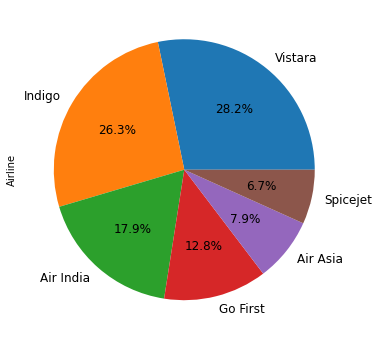

In [22]:
plt.figure(figsize=(10,6))
(df['Airline'].value_counts()*100 /len(df)).plot.pie(autopct='%1.1f%%',labels = ['Vistara','Indigo','Air India','Go First','Air Asia','Spicejet'],
         fontsize=12)
df['Airline'].value_counts()

- We can observe that majority of the airlines in the dataset are Vistara and Indigo.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'New Delhi (DEL)'),
  Text(1, 0, 'Mumbai (BOM)'),
  Text(2, 0, 'Bangalore (BLR)'),
  Text(3, 0, 'Hyderabad (HYD)'),
  Text(4, 0, 'Srinagar (SXR)')])

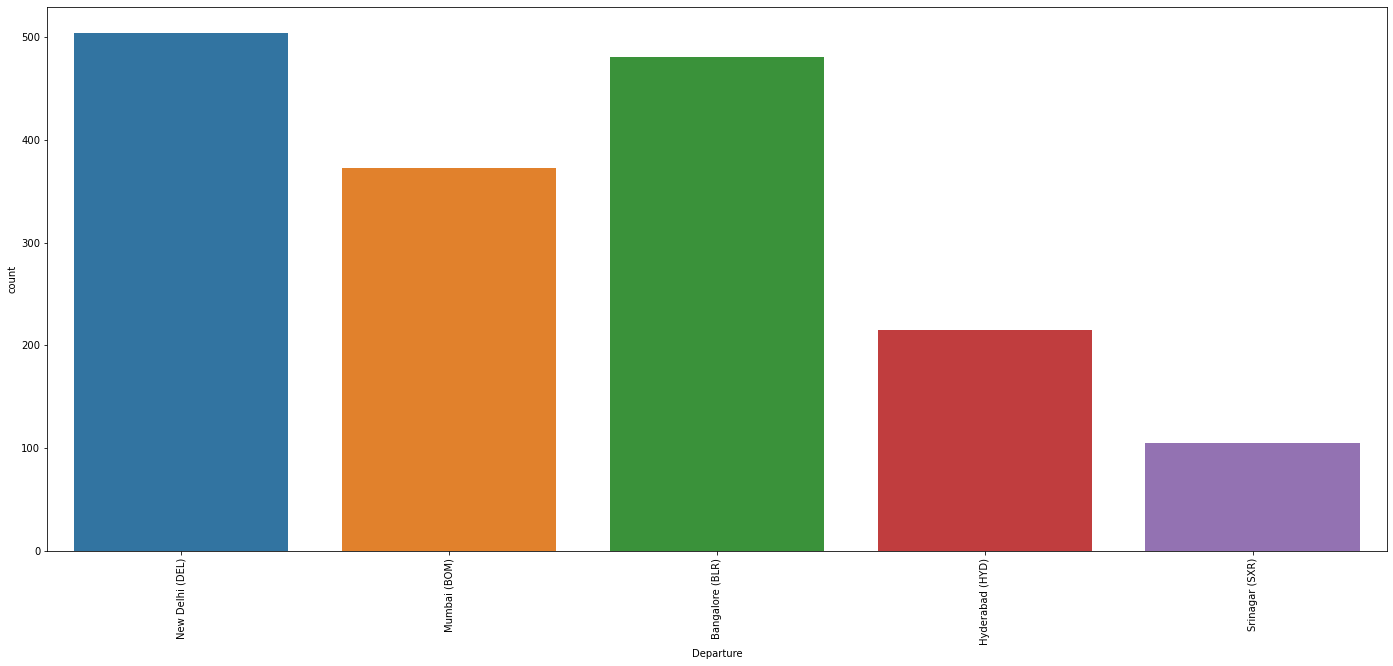

In [23]:
plt.figure(figsize=(24,10))
sns.countplot(df['Departure']) 
plt.xticks(rotation=90)

- We can observe that majority of the flights in the dataset are departed from 'Delhi' or 'Banglore'

Kolkata      619
New Delhi    586
Chennai      258
Pune         215
Name: Arrival, dtype: int64

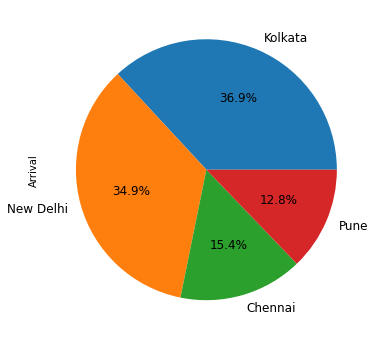

In [24]:
plt.figure(figsize=(10,6))
(df['Arrival'].value_counts()*100 /len(df)).plot.pie(autopct='%1.1f%%',labels = ['Kolkata','New Delhi','Chennai','Pune'],
         fontsize=12)
df['Arrival'].value_counts()

- We can observe that 'Kolkata' and 'New Delhi' is tthe most arrived city in the dataset.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'New Delhi (DEL)'),
  Text(1, 0, 'Mumbai (BOM)'),
  Text(2, 0, 'Bangalore (BLR)'),
  Text(3, 0, 'Hyderabad (HYD)'),
  Text(4, 0, 'Srinagar (SXR)')])

<Figure size 1728x720 with 0 Axes>

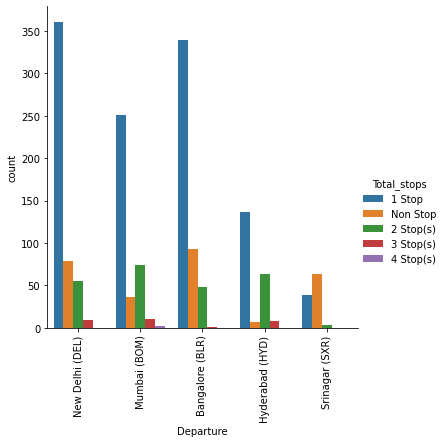

In [25]:
plt.figure(figsize=(24,10))
sns.catplot(x ="Departure", hue ="Total_stops",  kind ="count", data = df) 
plt.xticks(rotation=90)

- We can observe that in all the cities except 'Srinagar', majority of the flights are having 1 stop but majority of the flights from 'Srinagar' are non-stop.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1 Stop'),
  Text(1, 0, 'Non Stop'),
  Text(2, 0, '2 Stop(s)'),
  Text(3, 0, '3 Stop(s)'),
  Text(4, 0, '4 Stop(s)')])

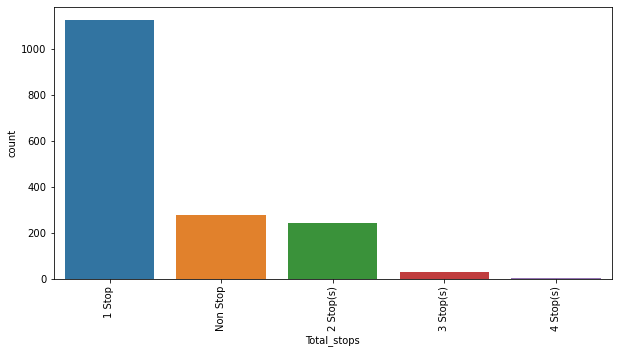

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['Total_stops']) 
plt.xticks(rotation=90)

- We can observe that maximum number of flight have 1 stop in their route.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'New Delhi (DEL)'),
  Text(1, 0, 'Mumbai (BOM)'),
  Text(2, 0, 'Bangalore (BLR)'),
  Text(3, 0, 'Hyderabad (HYD)'),
  Text(4, 0, 'Srinagar (SXR)')])

<Figure size 2160x1440 with 0 Axes>

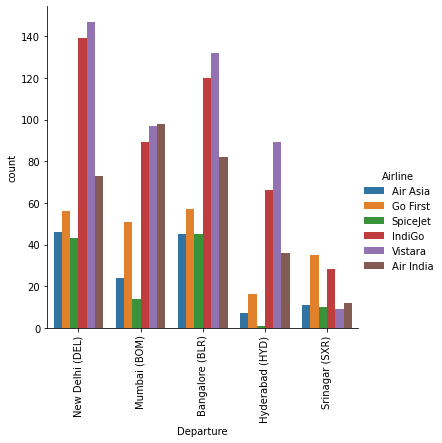

In [27]:
plt.figure(figsize=(30,20))
sns.catplot(x ="Departure", hue ="Airline",  kind ="count", data = df)
plt.xticks(rotation=90)

- We can observe that from 'Banglore','Delhi' and 'Hydrabad' vistara and indigo have most number of flights. From 'Mumbai', Air india and vistara and indigo have most number of flights.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Air India'),
  Text(1, 0, 'Vistara'),
  Text(2, 0, 'IndiGo'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Go First'),
  Text(5, 0, 'Air Asia')])

<Figure size 1080x720 with 0 Axes>

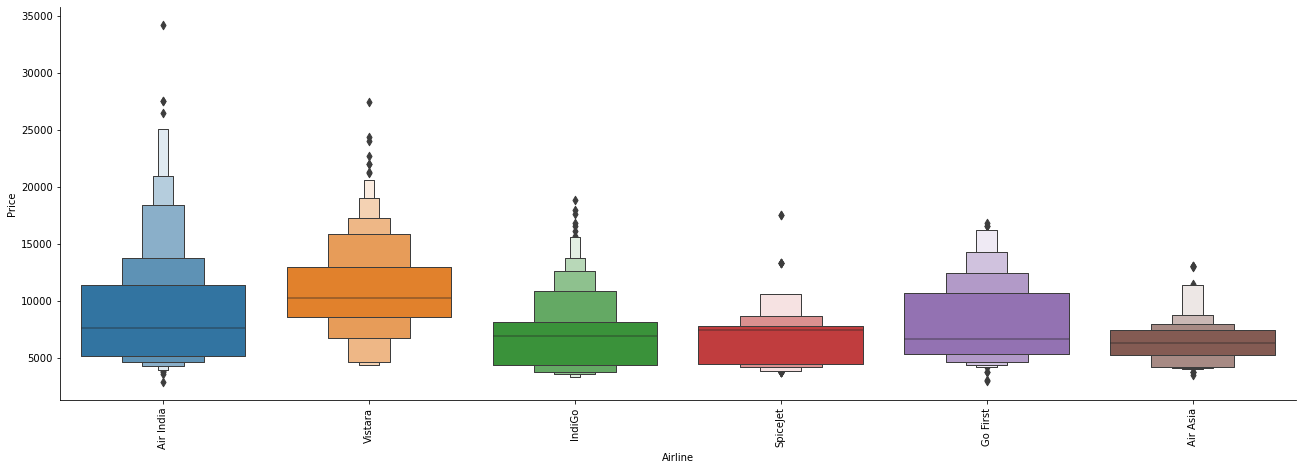

In [28]:
plt.figure(figsize = (15, 10))
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.xticks(rotation=90)

- We can observe that 'Air India' has the highest price of ticket and 'Air Asia' has the lowest price of ticket.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'New Delhi (DEL)'),
  Text(1, 0, 'Hyderabad (HYD)'),
  Text(2, 0, 'Mumbai (BOM)'),
  Text(3, 0, 'Srinagar (SXR)'),
  Text(4, 0, 'Bangalore (BLR)')])

<Figure size 1080x720 with 0 Axes>

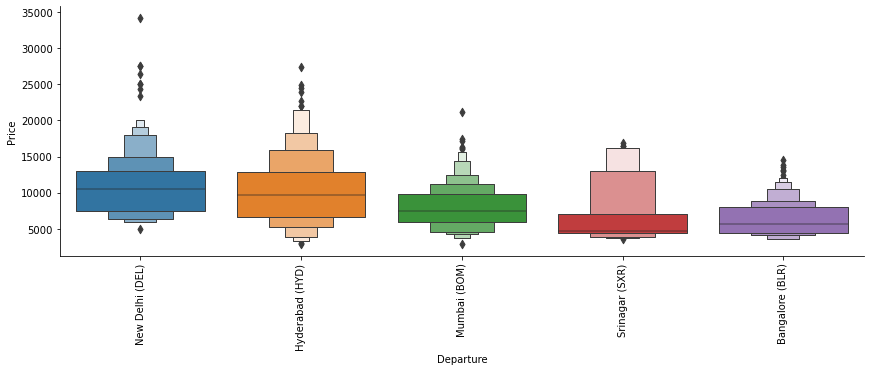

In [29]:
plt.figure(figsize = (15, 10))
sns.catplot(y = "Price", x = "Departure", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.xticks(rotation=90)

- We can observe that from 'New Delhi', the ticket price is the highest and from 'Banglore' the ticket price is the lowest.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1 Stop'),
  Text(1, 0, '2 Stop(s)'),
  Text(2, 0, '3 Stop(s)'),
  Text(3, 0, 'Non Stop'),
  Text(4, 0, '4 Stop(s)')])

<Figure size 1080x720 with 0 Axes>

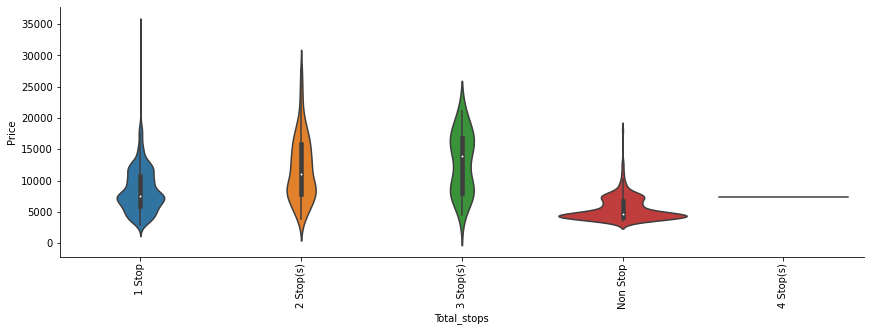

In [30]:
plt.figure(figsize = (15, 10))
sns.catplot(y = "Price", x = "Total_stops", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.xticks(rotation=90)

- We can observe that the flights which have 1 stop have higher price than any other.

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, 'Wed, 20 Oct 2021'),
  Text(0.0, 0, 'Fri, 19 Nov 2021'),
  Text(2.0, 0, 'Fri, 29 Oct 2021'),
  Text(4.0, 0, 'Sat, 20 Nov 2021'),
  Text(6.0, 0, 'Sun, 21 Nov 2021'),
  Text(8.0, 0, 'Thu, 18 Nov 2021'),
  Text(10.0, 0, 'Tue, 2 Nov 2021'),
  Text(12.0, 0, 'Wed, 10 Nov 2021'),
  Text(14.0, 0, 'Wed, 20 Oct 2021'),
  Text(16.0, 0, '')])

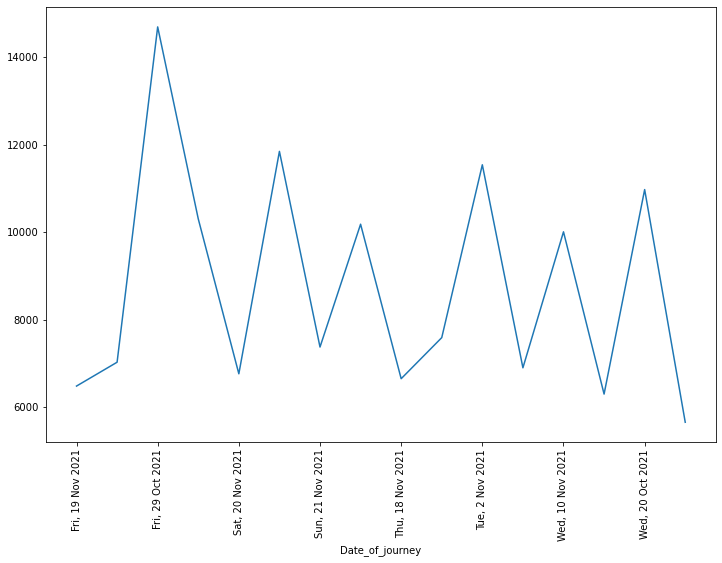

In [31]:
a=df.groupby('Date_of_journey').mean()
plt.figure(figsize=(12,8))
a['Price'].plot()
plt.xticks(rotation=90)

- We can observe that the price of the flighs are higher around date 29 oct 2021.

<AxesSubplot:xlabel='Price', ylabel='Density'>

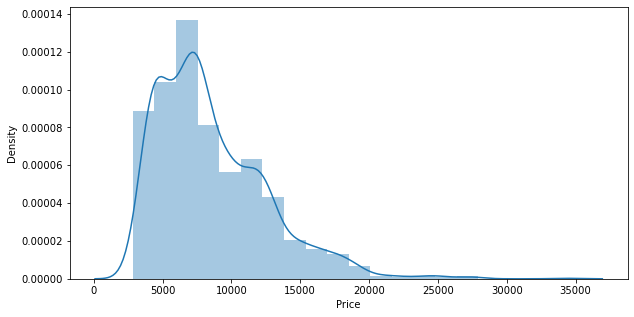

In [32]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Price'], bins=20)

- We can observe that the majority of the flights have price range from 3000 to 12000.

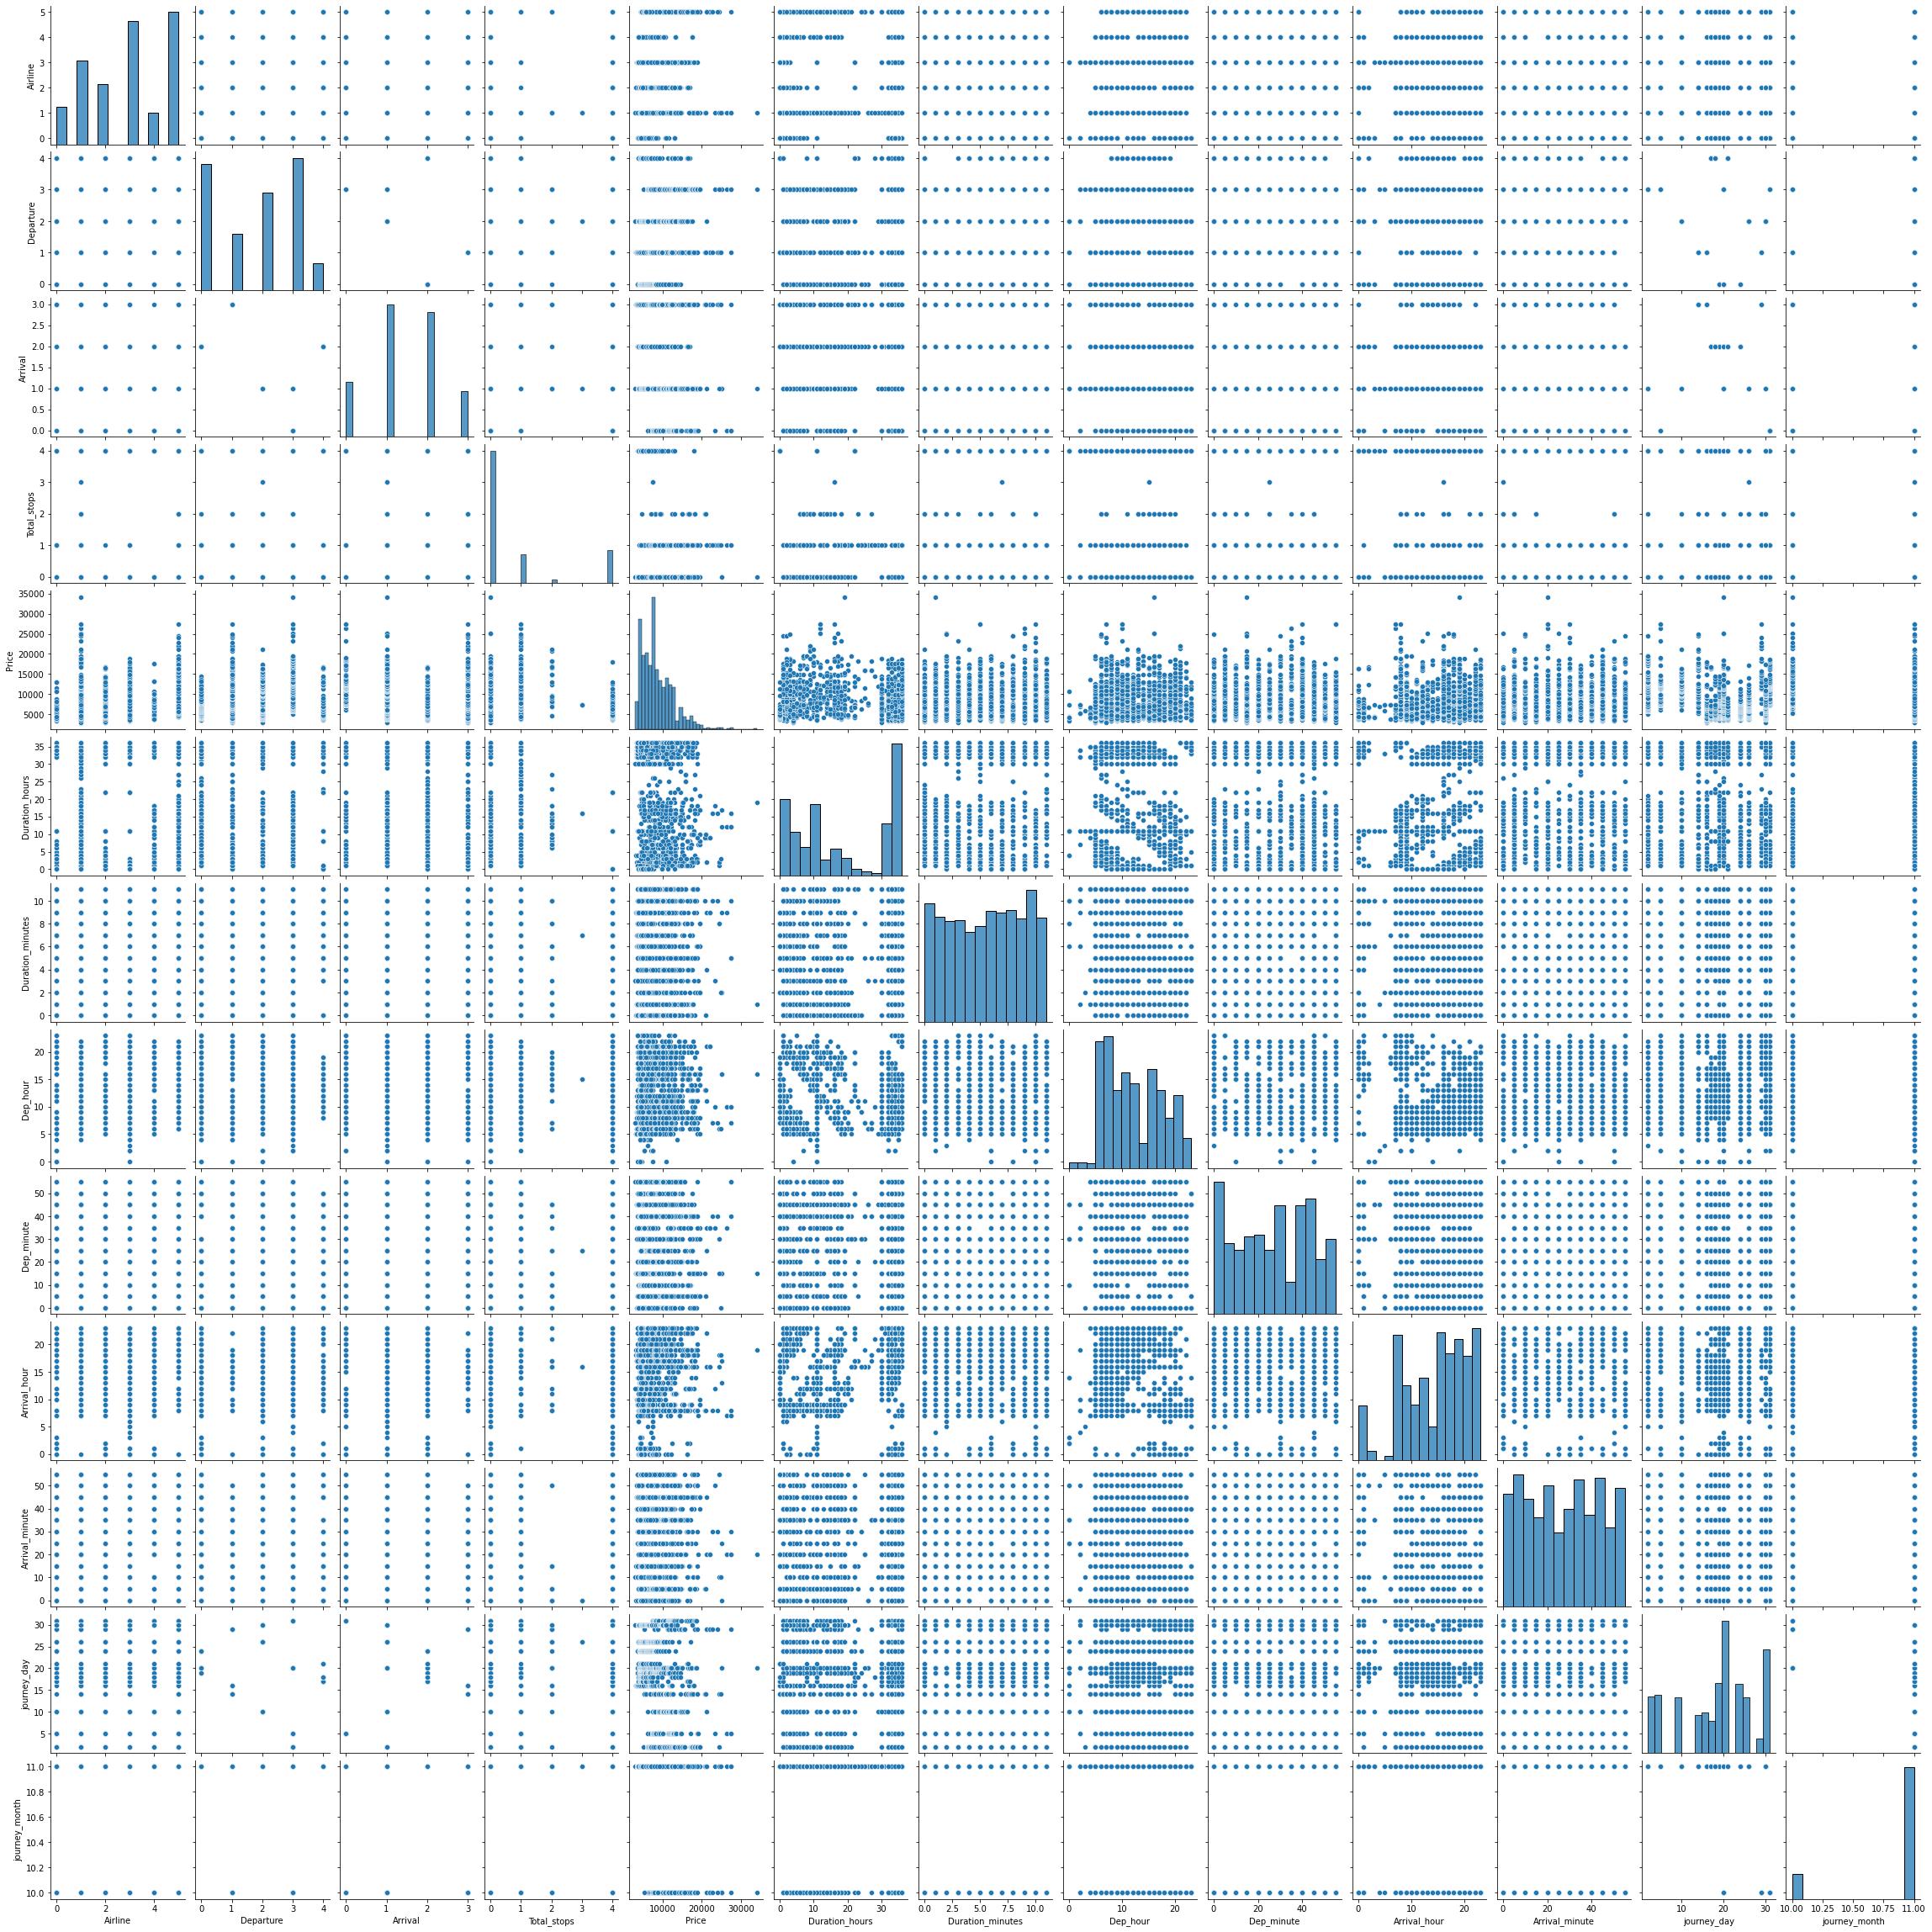

In [55]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Departure'}>,
        <AxesSubplot:title={'center':'Arrival'}>,
        <AxesSubplot:title={'center':'Total_stops'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>],
       [<AxesSubplot:title={'center':'Duration_minutes'}>,
        <AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_minute'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>,
        <AxesSubplot:title={'center':'Arrival_minute'}>,
        <AxesSubplot:title={'center':'journey_day'}>],
       [<AxesSubplot:title={'center':'journey_month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

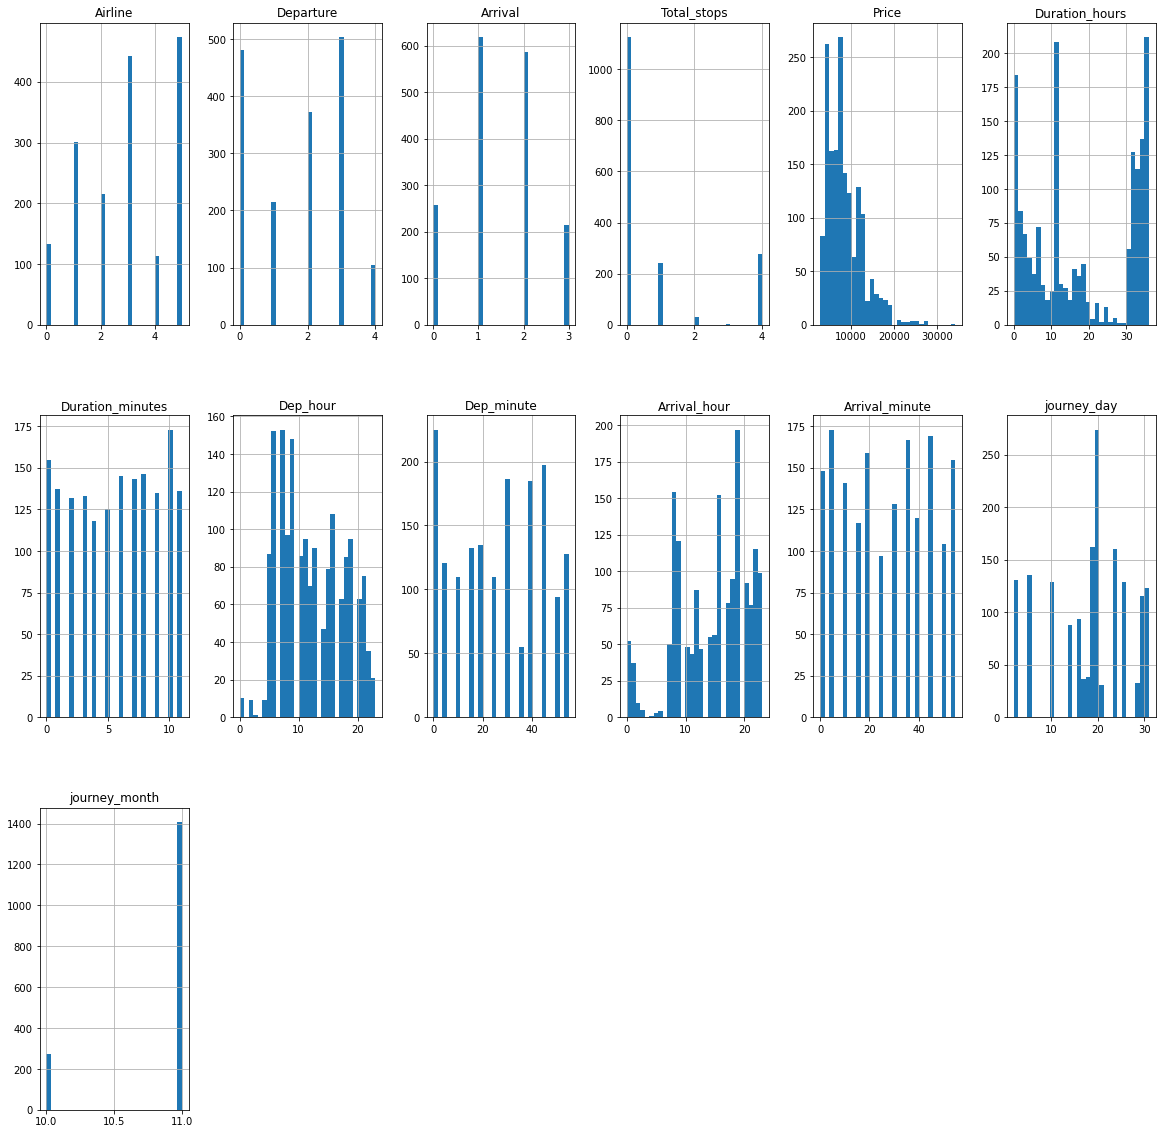

In [56]:
# Histogram to see the data distribution of all the columns'
df.hist(figsize=(20,20), grid = True, layout = (3,6), bins = 30)

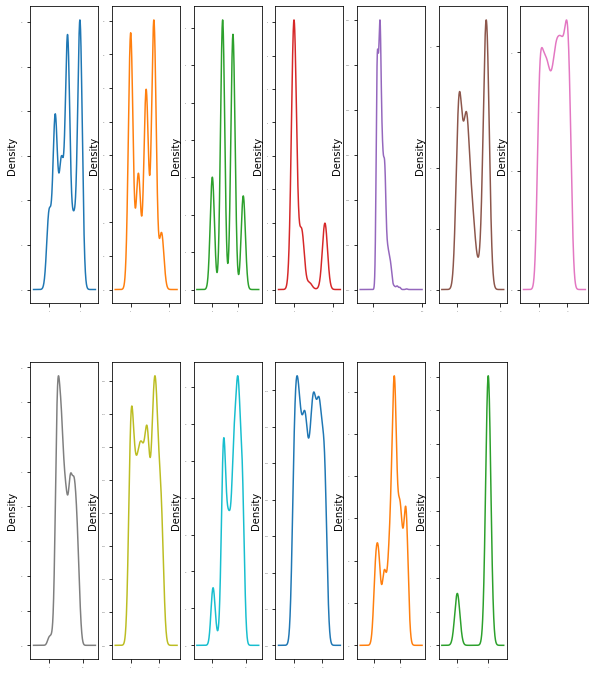

In [57]:
df.plot(kind='density',subplots=True,  layout=(2,7), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

### Data Pre-Processing

In [33]:
duration= list(df['Duration'])
for i in range (len(duration)):
    if len(duration[i].split(' '))==2:        # Check if duration contains only hour or mins
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+ ' '+ '0m'       # Adds 0 minute
        else:
            duration[i]='0h'+' ' + duration[i]        # Adds 0 hour

In [34]:
df['Duration']=duration

In [35]:
df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price
0,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,18:40,6h 55m,1 Stop,5951
1,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,18:40,7h 00m,1 Stop,5951
2,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,16:15,9h 20m,1 Stop,5951
3,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,16:15,9h 25m,1 Stop,5951
4,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,21:20,08:00,13h 20m,1 Stop,5951
...,...,...,...,...,...,...,...,...,...
1673,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,22:25,15:10,7h 15m,1 Stop,16226
1674,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,00:50\n+ 1 day,15:10,9h 40m,1 Stop,16226
1675,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,02:00\n+ 1 day,15:10,10h 50m,1 Stop,16226
1676,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,08:10\n+ 1 day,15:10,17h 00m,1 Stop,16226


In [36]:
def hours(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]



df['Duration_hours']= df['Duration'].apply(hours)
df['Duration_minutes']=df['Duration'].apply(minute)
df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Dep_time,Duration,Total_stops,Price,Duration_hours,Duration_minutes
0,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,18:40,6h 55m,1 Stop,5951,6,55
1,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,18:40,7h 00m,1 Stop,5951,7,00
2,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,16:15,9h 20m,1 Stop,5951,9,20
3,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,16:15,9h 25m,1 Stop,5951,9,25
4,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,21:20,08:00,13h 20m,1 Stop,5951,13,20
...,...,...,...,...,...,...,...,...,...,...,...
1673,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,22:25,15:10,7h 15m,1 Stop,16226,7,15
1674,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,00:50\n+ 1 day,15:10,9h 40m,1 Stop,16226,9,40
1675,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,02:00\n+ 1 day,15:10,10h 50m,1 Stop,16226,10,50
1676,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,08:10\n+ 1 day,15:10,17h 00m,1 Stop,16226,17,00


In [37]:
df.drop(["Duration"], axis = 1, inplace = True)

- I have seperated the hours and minutes of the duration column and make a seperate column for both of them and drop the duration column.

In [38]:
df["Dep_hour"] = pd.to_datetime(df["Dep_time"]).dt.hour

In [39]:
df["Dep_minute"] = pd.to_datetime(df["Dep_time"]).dt.minute

In [40]:
df.drop(["Dep_time"], axis = 1, inplace = True)

In [41]:
df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Total_stops,Price,Duration_hours,Duration_minutes,Dep_hour,Dep_minute
0,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,1 Stop,5951,6,55,18,40
1,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,1 Stop,5951,7,00,18,40
2,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35\n+ 1 day,1 Stop,5951,9,20,16,15
3,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40\n+ 1 day,1 Stop,5951,9,25,16,15
4,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,21:20,1 Stop,5951,13,20,8,0
...,...,...,...,...,...,...,...,...,...,...,...
1673,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,22:25,1 Stop,16226,7,15,15,10
1674,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,00:50\n+ 1 day,1 Stop,16226,9,40,15,10
1675,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,02:00\n+ 1 day,1 Stop,16226,10,50,15,10
1676,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,08:10\n+ 1 day,1 Stop,16226,17,00,15,10


- I have seperated the hours and minutes of the Dep_time column and make a seperate column for both of them and drop the Dep_time column.

In [42]:
start, stop, step = 0, 5, 1

df["Arr_time"]= df["Arr_time"].str.slice(start, stop, step)

In [43]:
df

,Airline,Date_of_journey,Departure,Arrival,Arr_time,Total_stops,Price,Duration_hours,Duration_minutes,Dep_hour,Dep_minute
0,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35,1 Stop,5951,6,55,18,40
1,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40,1 Stop,5951,7,00,18,40
2,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:35,1 Stop,5951,9,20,16,15
3,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,01:40,1 Stop,5951,9,25,16,15
4,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,21:20,1 Stop,5951,13,20,8,0
...,...,...,...,...,...,...,...,...,...,...,...
1673,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,22:25,1 Stop,16226,7,15,15,10
1674,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,00:50,1 Stop,16226,9,40,15,10
1675,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,02:00,1 Stop,16226,10,50,15,10
1676,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,08:10,1 Stop,16226,17,00,15,10


In [44]:
df["Arrival_hour"] = pd.to_datetime(df['Arr_time']).dt.hour
df["Arrival_minute"] = pd.to_datetime(df['Arr_time']).dt.minute
df.drop(["Arr_time"], axis = 1, inplace = True)

In [45]:
df

,Airline,Date_of_journey,Departure,Arrival,Total_stops,Price,Duration_hours,Duration_minutes,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,1 Stop,5951,6,55,18,40,1,35
1,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,1 Stop,5951,7,00,18,40,1,40
2,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,1 Stop,5951,9,20,16,15,1,35
3,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,1 Stop,5951,9,25,16,15,1,40
4,Air Asia,"Wed, 20 Oct 2021",New Delhi (DEL),Kolkata,1 Stop,5951,13,20,8,0,21,20
...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,1 Stop,16226,7,15,15,10,22,25
1674,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,1 Stop,16226,9,40,15,10,0,50
1675,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,1 Stop,16226,10,50,15,10,2,0
1676,Go First,"Sun, 21 Nov 2021",Srinagar (SXR),New Delhi,1 Stop,16226,17,00,15,10,8,10


- I have seperated the hours and minutes of the Arr_time column and make a seperate column for both of them and drop the Arr_time column.

In [46]:
df['Date_of_journey']=pd.to_datetime(df['Date_of_journey'])

In [47]:
df['journey_day']=df['Date_of_journey'].dt.day
df['journey_month']=df['Date_of_journey'].dt.month
df['journey_year']=df['Date_of_journey'].dt.year

In [48]:
df.drop(["Date_of_journey"], axis = 1, inplace = True)

In [49]:
df

,Airline,Departure,Arrival,Total_stops,Price,Duration_hours,Duration_minutes,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,journey_day,journey_month,journey_year
0,Air Asia,New Delhi (DEL),Kolkata,1 Stop,5951,6,55,18,40,1,35,20,10,2021
1,Air Asia,New Delhi (DEL),Kolkata,1 Stop,5951,7,00,18,40,1,40,20,10,2021
2,Air Asia,New Delhi (DEL),Kolkata,1 Stop,5951,9,20,16,15,1,35,20,10,2021
3,Air Asia,New Delhi (DEL),Kolkata,1 Stop,5951,9,25,16,15,1,40,20,10,2021
4,Air Asia,New Delhi (DEL),Kolkata,1 Stop,5951,13,20,8,0,21,20,20,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Go First,Srinagar (SXR),New Delhi,1 Stop,16226,7,15,15,10,22,25,21,11,2021
1674,Go First,Srinagar (SXR),New Delhi,1 Stop,16226,9,40,15,10,0,50,21,11,2021
1675,Go First,Srinagar (SXR),New Delhi,1 Stop,16226,10,50,15,10,2,0,21,11,2021
1676,Go First,Srinagar (SXR),New Delhi,1 Stop,16226,17,00,15,10,8,10,21,11,2021


- I have seperated the Days, month and year of the Date_of_journey column and make a seperate column for each of them and drop the Date_of_journey column.

In [50]:
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [51]:
df

,Airline,Departure,Arrival,Total_stops,Price,Duration_hours,Duration_minutes,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,journey_day,journey_month,journey_year
0,0.0,3.0,1.0,0.0,5951,33.0,11.0,18,40,1,35,20,10,2021
1,0.0,3.0,1.0,0.0,5951,34.0,0.0,18,40,1,40,20,10,2021
2,0.0,3.0,1.0,0.0,5951,36.0,4.0,16,15,1,35,20,10,2021
3,0.0,3.0,1.0,0.0,5951,36.0,5.0,16,15,1,40,20,10,2021
4,0.0,3.0,1.0,0.0,5951,4.0,4.0,8,0,21,20,20,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2.0,4.0,2.0,0.0,16226,34.0,3.0,15,10,22,25,21,11,2021
1674,2.0,4.0,2.0,0.0,16226,36.0,8.0,15,10,0,50,21,11,2021
1675,2.0,4.0,2.0,0.0,16226,1.0,10.0,15,10,2,0,21,11,2021
1676,2.0,4.0,2.0,0.0,16226,8.0,0.0,15,10,8,10,21,11,2021


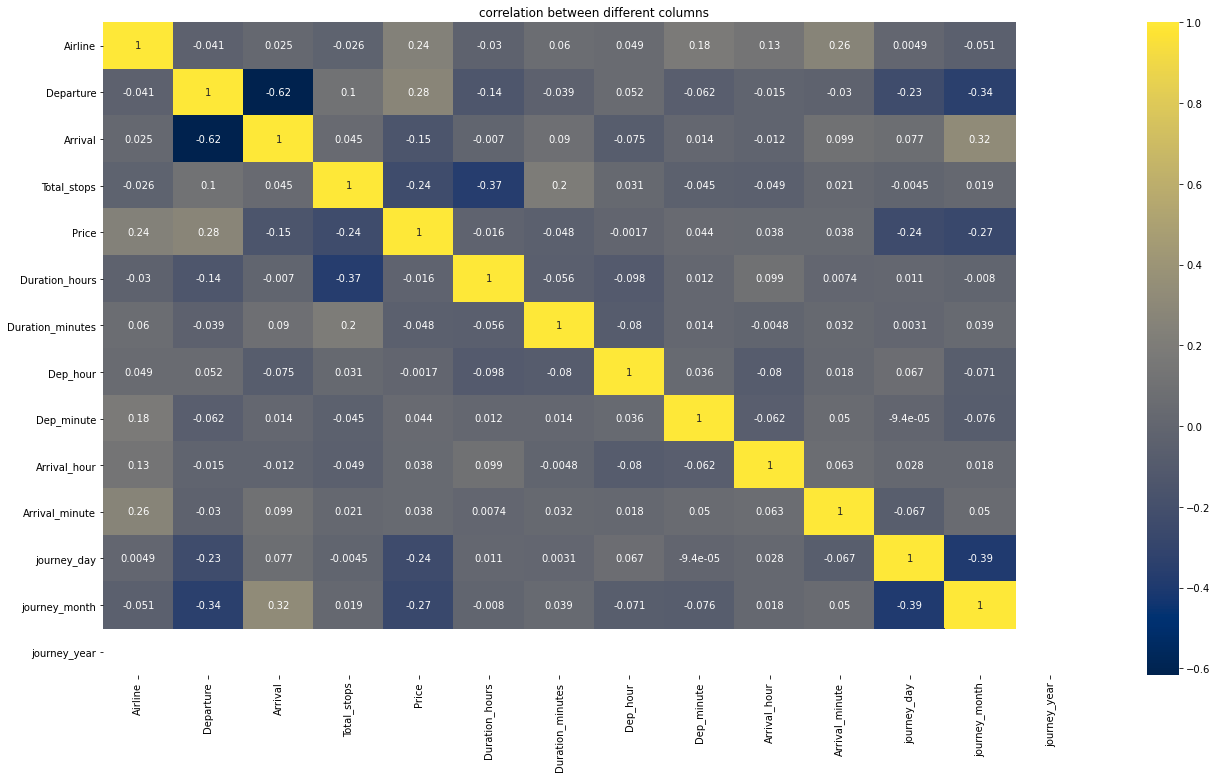

In [52]:
# Let's see the correlation between different columns.
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

- We can observe that 'Airline' and 'Departure' is the most positively correlated column with the 'Price' and 'journey_month' and 'journey_day' is the most negatively correlated column with the 'Price'.

In [53]:
df.drop(["journey_year"], axis = 1, inplace = True)

In [54]:
df.describe()

,Airline,Departure,Arrival,Total_stops,Price,Duration_hours,Duration_minutes,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,journey_day,journey_month
count,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000
mean,2.907628,1.724076,1.451728,0.844458,8576.519070,18.167461,5.588200,12.254470,26.606079,14.588200,27.085816,18.404052,10.838498
std,1.658120,1.322988,0.901066,1.470116,4039.100579,13.286215,3.516419,5.345897,17.786694,6.048524,17.622552,8.565788,0.368103
min,0.000000,0.000000,0.000000,0.000000,2835.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,10.000000
25%,1.000000,0.000000,1.000000,0.000000,5614.000000,5.000000,2.000000,7.000000,10.000000,9.000000,10.000000,14.000000,11.000000
50%,3.000000,2.000000,1.000000,0.000000,7425.000000,15.000000,6.000000,11.000000,30.000000,16.000000,30.000000,20.000000,11.000000
75%,5.000000,3.000000,2.000000,1.000000,10900.750000,33.000000,9.000000,17.000000,40.000000,19.000000,45.000000,24.000000,11.000000
max,5.000000,4.000000,3.000000,4.000000,34200.000000,36.000000,11.000000,23.000000,55.000000,23.000000,55.000000,31.000000,11.000000


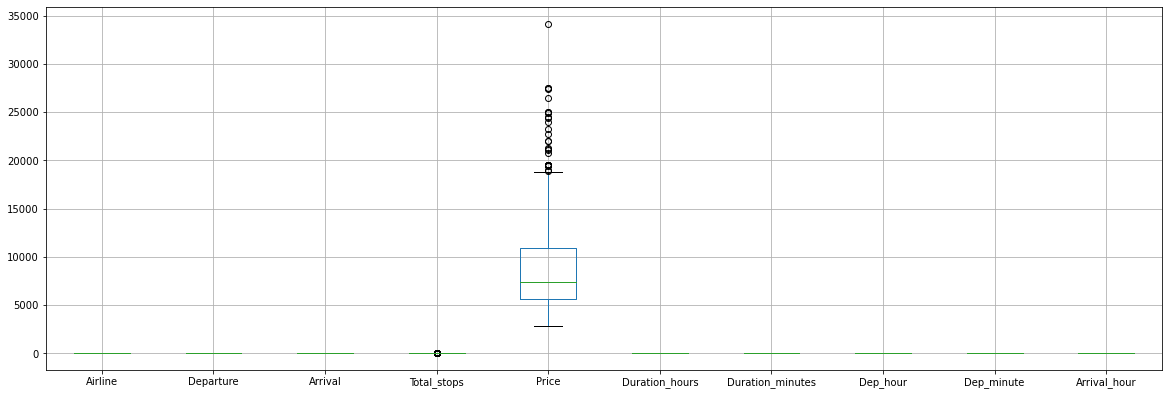

In [58]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

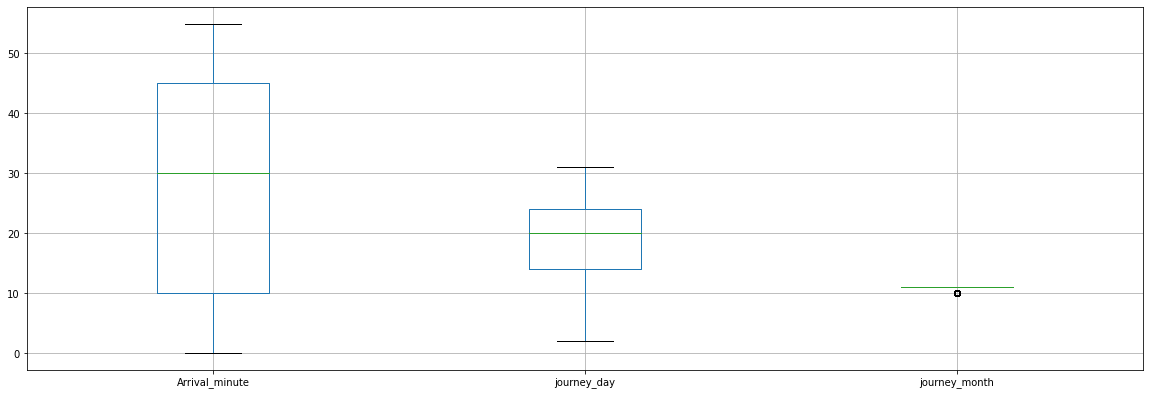

In [59]:
#checking the outliers
df.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

- We can observe that there are no considerable outliers in the dataset.

In [60]:
df.skew()

Airline            -0.134886
Departure          -0.065496
Arrival             0.039266
Total_stops         1.525863
Price               1.293883
Duration_hours      0.100130
Duration_minutes   -0.067966
Dep_hour            0.223506
Dep_minute         -0.038579
Arrival_hour       -0.595843
Arrival_minute      0.018179
journey_day        -0.416277
journey_month      -1.841345
dtype: float64

In [61]:
df_new=power_transform(df)

df_new=pd.DataFrame(df_new,columns=df.columns)

In [62]:
df_new.skew()

Airline            -0.193178
Departure          -0.207942
Arrival            -0.096730
Total_stops         0.800166
Price               0.015950
Duration_hours     -0.249719
Duration_minutes   -0.248512
Dep_hour           -0.057331
Dep_minute         -0.402781
Arrival_hour       -0.346617
Arrival_minute     -0.331994
journey_day        -0.296665
journey_month      -1.841345
dtype: float64

### Model Building

In [63]:
x=df_new.drop('Price', axis=1)
y=df_new['Price']

In [64]:
x

,Airline,Departure,Arrival,Total_stops,Duration_hours,Duration_minutes,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,journey_day,journey_month
0,-1.805168,0.955135,-0.468550,-0.691465,1.050272,1.439433,1.061323,0.767679,-2.036320,0.523667,0.157568,-2.278570
1,-1.805168,0.955135,-0.468550,-0.691465,1.099514,-1.729659,1.061323,0.767679,-2.036320,0.756217,0.157568,-2.278570
2,-1.805168,0.955135,-0.468550,-0.691465,1.195892,-0.373995,0.735922,-0.496221,-2.036320,0.523667,0.157568,-2.278570
3,-1.805168,0.955135,-0.468550,-0.691465,1.195892,-0.088721,0.735922,-0.496221,-2.036320,0.756217,0.157568,-2.278570
4,-1.805168,0.955135,-0.468550,-0.691465,-1.045552,-0.373995,-0.756196,-1.735874,1.109647,-0.253710,0.157568,-2.278570
...,...,...,...,...,...,...,...,...,...,...,...,...
1673,-0.526408,1.580938,0.626106,-0.691465,1.099514,-0.673471,0.567594,-0.818731,1.302042,0.021865,0.278833,0.438872
1674,-0.526408,1.580938,0.626106,-0.691465,1.195892,0.706713,0.567594,-0.818731,-2.127534,1.194046,0.278833,0.438872
1675,-0.526408,1.580938,0.626106,-0.691465,-1.531733,1.200714,0.567594,-0.818731,-1.931133,-1.835133,0.278833,0.438872
1676,-0.526408,1.580938,0.626106,-0.691465,-0.596774,-1.729659,0.567594,-0.818731,-1.134801,-0.886832,0.278833,0.438872


In [65]:
y=pd.DataFrame(y, columns=['Price'])

In [66]:
y

,Price
0,-0.572177
1,-0.572177
2,-0.572177
3,-0.572177
4,-0.572177
...,...
1673,1.602165
1674,1.602165
1675,1.602165
1676,1.602165


In [67]:
#checking the best random state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.3255487809239258
At random state 0, the testing accuracy is:- 0.2696177388554267


At random state 1, the training accuracy is:- 0.3196514113479826
At random state 1, the testing accuracy is:- 0.2981642340622601


At random state 2, the training accuracy is:- 0.3089370167738529
At random state 2, the testing accuracy is:- 0.3390969828770861


At random state 3, the training accuracy is:- 0.3185185930505483
At random state 3, the testing accuracy is:- 0.28740481007425767


At random state 4, the training accuracy is:- 0.31845580310888877
At random state 4, the testing accuracy is:- 0.3044637780543057


At random state 5, the training accuracy is:- 0.3214190001050242
At random state 5, the testing accuracy is:- 0.2825849102728326


At random state 6, the training accuracy is:- 0.31873373520186987
At random state 6, the testing accuracy is:- 0.3030534855085161


At random state 7, the training accuracy is:- 0.31825400180014574
At random stat

At random state 62, the training accuracy is:- 0.3043725499105224
At random state 62, the testing accuracy is:- 0.3553307062375115


At random state 63, the training accuracy is:- 0.3090932131376427
At random state 63, the testing accuracy is:- 0.3430265668365955


At random state 64, the training accuracy is:- 0.3124642939657195
At random state 64, the testing accuracy is:- 0.3263880283494287


At random state 65, the training accuracy is:- 0.3240382101013738
At random state 65, the testing accuracy is:- 0.2796731242249214


At random state 66, the training accuracy is:- 0.3209714938510566
At random state 66, the testing accuracy is:- 0.2879209893039255


At random state 67, the training accuracy is:- 0.3248553618799104
At random state 67, the testing accuracy is:- 0.27924702269404367


At random state 68, the training accuracy is:- 0.3109245716951662
At random state 68, the testing accuracy is:- 0.3293018920379607


At random state 69, the training accuracy is:- 0.30342515707738493
A

At random state 124, the training accuracy is:- 0.30787600359294665
At random state 124, the testing accuracy is:- 0.3456900278450671


At random state 125, the training accuracy is:- 0.30404822217681493
At random state 125, the testing accuracy is:- 0.36313885652004463


At random state 126, the training accuracy is:- 0.32347182785874684
At random state 126, the testing accuracy is:- 0.2881471774512202


At random state 127, the training accuracy is:- 0.3181684229971721
At random state 127, the testing accuracy is:- 0.30484008731220924


At random state 128, the training accuracy is:- 0.3165406280240666
At random state 128, the testing accuracy is:- 0.3137746112341838


At random state 129, the training accuracy is:- 0.33102182476900965
At random state 129, the testing accuracy is:- 0.24430813679592978


At random state 130, the training accuracy is:- 0.32154878563760114
At random state 130, the testing accuracy is:- 0.2725096116833965


At random state 131, the training accuracy is:-

At random state 187, the testing accuracy is:- 0.2905150483375175


At random state 188, the training accuracy is:- 0.31140852222814863
At random state 188, the testing accuracy is:- 0.33143440923527145


At random state 189, the training accuracy is:- 0.33482355299882804
At random state 189, the testing accuracy is:- 0.2428273665575168


At random state 190, the training accuracy is:- 0.31533096903127733
At random state 190, the testing accuracy is:- 0.3204079303663776


At random state 191, the training accuracy is:- 0.30877219546451906
At random state 191, the testing accuracy is:- 0.3463732484044546


At random state 192, the training accuracy is:- 0.32854069470458347
At random state 192, the testing accuracy is:- 0.2601119286857585


At random state 193, the training accuracy is:- 0.3182703093180801
At random state 193, the testing accuracy is:- 0.30621461892199386


At random state 194, the training accuracy is:- 0.32499046551428756
At random state 194, the testing accuracy is:- 

- From the above stats, at random state 59 the testing accuracy and training accuracy is hightest.

- Testing the best Random State in different algorithms

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=59)

In [69]:
x_train

,Airline,Departure,Arrival,Total_stops,Duration_hours,Duration_minutes,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,journey_day,journey_month
1254,1.244587,0.279115,-0.468550,1.125923,-0.697354,0.449925,-1.204289,-0.818731,1.302042,0.979218,1.400137,0.438872
562,-1.805168,-1.351853,0.626106,-0.691465,1.099514,1.200714,0.217970,-1.735874,0.919635,1.194046,0.037062,0.438872
61,0.077204,0.955135,-0.468550,-0.691465,1.050272,0.449925,-0.756196,1.390511,0.008471,0.279735,0.157568,-2.278570
882,0.077204,0.955135,-0.468550,-0.691465,1.000286,-1.729659,-1.204289,-1.735874,-0.666779,-1.835133,-1.837364,0.438872
159,-0.526408,0.955135,-1.675835,-0.691465,-1.531733,0.706713,1.525193,-1.735874,-1.282109,0.756217,1.527670,-2.278570
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,-1.149853,0.279115,-0.468550,-0.691465,0.128749,-0.991785,1.061323,-1.735874,0.732090,-0.886832,-1.006496,0.438872
663,1.244587,-1.351853,0.626106,-0.691465,0.897944,0.956696,0.035817,-0.207183,0.364759,-1.279674,0.037062,0.438872
1229,-1.149853,0.279115,-0.468550,-0.691465,-0.596774,-1.729659,0.735922,-1.735874,-0.982927,-1.835133,1.400137,0.438872
1452,-1.805168,-1.351853,0.626106,1.658911,-0.325240,1.200714,-3.089005,0.982857,-1.815704,0.523667,0.646898,0.438872


In [70]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info= mutual_info_regression(x_train.fillna(0), y_train)
mutual_info

array([0.7461368 , 0.84341601, 0.70495478, 0.41801708, 0.3752795 ,
       0.21707315, 0.26340862, 0.30514148, 0.49386735, 0.42661251,
       1.02704163, 0.13594221])

In [71]:
mutual_info=pd.Series(mutual_info)
mutual_info.index= x_train.columns
mutual_info.sort_values(ascending=False)

journey_day         1.027042
Departure           0.843416
Airline             0.746137
Arrival             0.704955
Arrival_hour        0.493867
Arrival_minute      0.426613
Total_stops         0.418017
Duration_hours      0.375280
Dep_minute          0.305141
Dep_hour            0.263409
Duration_minutes    0.217073
journey_month       0.135942
dtype: float64

<AxesSubplot:>

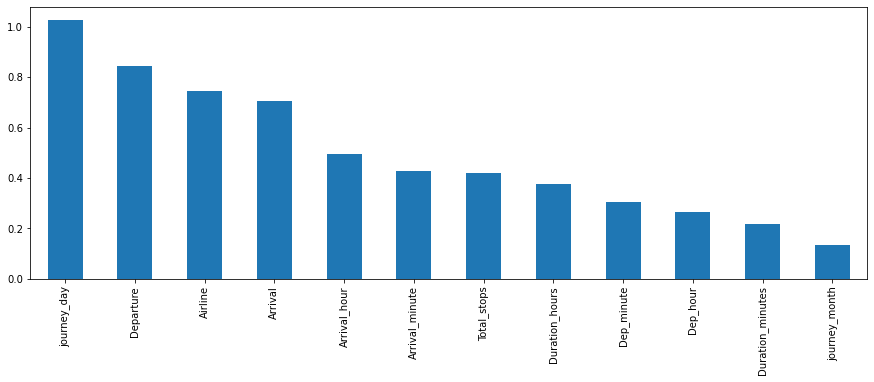

In [72]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [73]:
from sklearn.feature_selection import SelectKBest

In [74]:
sel_cols=SelectKBest(mutual_info_regression, k=10)
sel_cols.fit(x_train.fillna(0),y_train)
x_train.columns[sel_cols.get_support()]

Index(['Airline', 'Departure', 'Arrival', 'Total_stops', 'Duration_hours',
       'Dep_hour', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'journey_day'],
      dtype='object')

In [75]:
from sklearn.neighbors import KNeighborsRegressor

In [76]:
model=[LinearRegression(),SVR(),RandomForestRegressor(),DecisionTreeRegressor(),KernelRidge(),KNeighborsRegressor()]

In [77]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('r2 score of',n,'is:')
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print('\n')

r2 score of LinearRegression() is:
0.3946528179636486
0.6776145302171767
0.6666389221829517


r2 score of SVR() is:
0.6095832362247218
0.4370253630066607
0.47381233904080133


r2 score of RandomForestRegressor() is:
0.8028805514577051
0.2206518944572126
0.3071355902625163


r2 score of DecisionTreeRegressor() is:
0.6589665313710501
0.3817466083776419
0.35346436576047807


r2 score of KernelRidge() is:
0.39459979991506633
0.6776738776481207
0.6666468077683212


r2 score of KNeighborsRegressor() is:
0.5604693119301021
0.49200258884600095
0.5145656792780271




- Now checking cross validation score to check whether our models are overfitted or underfitted.

In [78]:
scrli=cross_val_score(LinearRegression(),x,y, cv=3)
print('cross validation score of linearregression: ',scrli.mean())

cross validation score of linearregression:  -0.09946820576487896


In [79]:
scrrf=cross_val_score(RandomForestRegressor(),x,y, cv=3)
print('cross validation score of RandomForestregression: ',scrrf.mean())

cross validation score of RandomForestregression:  0.20451061935282633


In [80]:
scrdtr=cross_val_score(DecisionTreeRegressor(),x,y, cv=3)
print('cross validation score of DecisionTreeregression: ',scrdtr.mean())

cross validation score of DecisionTreeregression:  0.011081089076496076


In [81]:
scrsvr=cross_val_score(SVR(),x,y, cv=3)
print('cross validation score of SVR: ',scrsvr.mean())

cross validation score of SVR:  0.34047744315961576


In [82]:
scrkr=cross_val_score(KernelRidge(),x,y, cv=3)
print('cross validation score of KernelRidge: ',scrkr.mean())

cross validation score of KernelRidge:  0.1812302469522734


In [83]:
scrkn=cross_val_score(KNeighborsRegressor(),x,y, cv=3)
print('cross validation score of KNeighborsRegressor: ',scrkn.mean())

cross validation score of KNeighborsRegressor:  0.13237891374011843


- Minimum difference in r2_score and cross validation score is for SVR (26.86). So it is our best model

### Hyperparameter Tunning

In [84]:
#creating parameter list to pass in GridSearchCV
parameters= {'kernel': ['linear','rbf','poly'],
             'epsilon': [0.1,0.01,0.001],
             'max_iter': np.arange(-5,5)}

In [85]:
GCV=GridSearchCV(SVR(), parameters,  cv = 3,)

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'max_iter': array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])})

In [87]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'epsilon': 0.1, 'kernel': 'rbf', 'max_iter': -1}

In [88]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [89]:
r2_score(y_test,GCV_pred,)

0.6095832362247218

In [90]:
joblib.dump(GCV.best_estimator_,'flight_price.obj')

['flight_price.obj']